# Advanced Regression Model Assignment 
## Prashant R Patil 

## Objective 
### To model the price of the house using Ridge and Lasso Regression for given set of variables provided in the CSV File.
### This can be further used by the management to understanding the pricing while getting to sell and purchase business model. 

In [449]:
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [450]:
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [451]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [452]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [453]:
data["SaleCondition"].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

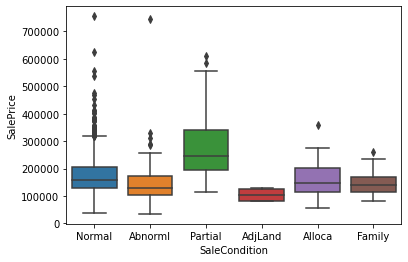

In [454]:
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = data)
plt.show()

In [455]:
# for now let me keep the sale condition as it is.

In [456]:
data["SaleType"].value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

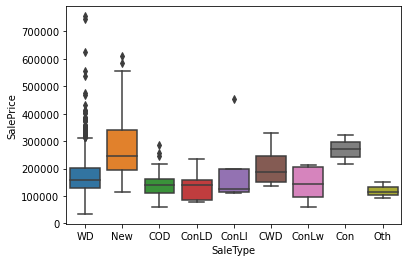

In [457]:
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = data)
plt.show()

In [458]:
# for now let me keep the sale type as it is.

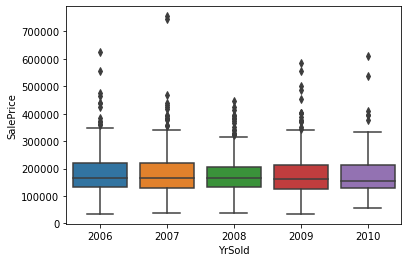

In [459]:
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = data)
plt.show()

In [460]:
data["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

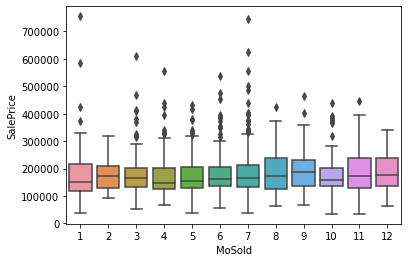

In [461]:
sns.boxplot(x = 'MoSold', y = 'SalePrice', data = data)
plt.show()

In [462]:
data["MoSold"].value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [463]:
# the median is not varying much with month and year being sold. But the month matters with number os sales.
#Given so many parameters inline , i will drop year of sale later 

In [464]:
##Looking at the number of houses with pool 

In [465]:
data["PoolArea"].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

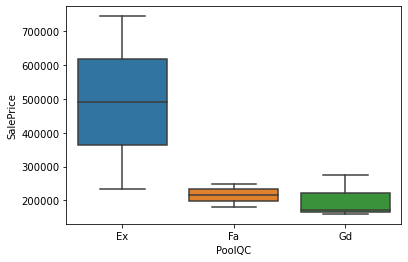

In [466]:
sns.boxplot(x = 'PoolQC', y = 'SalePrice', data = data)
plt.show()

<AxesSubplot:>

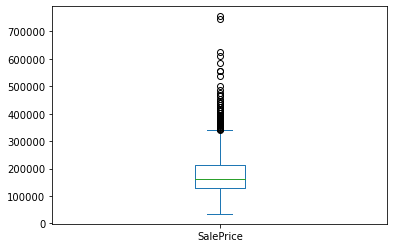

In [467]:
data['SalePrice'].plot(kind='box')

In [468]:
data.SalePrice[data["PoolArea"] != 0]

197     235000
810     181000
1170    171000
1182    745000
1298    160000
1386    250000
1423    274970
Name: SalePrice, dtype: int64

In [469]:
# To me the houses with pool are quite low and seems to impact median when taken out of the equation. 
# So I am taking out houses with pool out of the model given the number is low 

In [470]:
data1 = data[data.PoolArea == 0]


In [471]:
data1.drop(['Id','PoolArea','PoolQC',], axis = 1, inplace = True)
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1453 non-null   int64  
 1   MSZoning       1453 non-null   object 
 2   LotFrontage    1195 non-null   float64
 3   LotArea        1453 non-null   int64  
 4   Street         1453 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1453 non-null   object 
 7   LandContour    1453 non-null   object 
 8   Utilities      1453 non-null   object 
 9   LotConfig      1453 non-null   object 
 10  LandSlope      1453 non-null   object 
 11  Neighborhood   1453 non-null   object 
 12  Condition1     1453 non-null   object 
 13  Condition2     1453 non-null   object 
 14  BldgType       1453 non-null   object 
 15  HouseStyle     1453 non-null   object 
 16  OverallQual    1453 non-null   int64  
 17  OverallCond    1453 non-null   int64  
 18  YearBuil

In [472]:
data["MiscVal"].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [473]:
data["MiscFeature"].value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [474]:
# So what i think is to have model based on Misc Feature value rather including its categories.
# In case Misc Feature value has high coorelation with other independent variable, I will drop them both.
# if i see coefficient bit high (order or magnitude )on misc value , I will think of adding its category back 

In [475]:
data1.drop(['MiscFeature',], axis = 1, inplace = True)

In [476]:
data["Fence"].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [477]:
# most of the houses are without fence category but let me keep this variable 

In [478]:
# -all the variables seems to be striaghtforward for further consideration-
# PavedDrive	WoodDeckSF	OpenPorchSF	EnclosedPorch	3SsnPorch	ScreenPorch

In [479]:
data1["GarageFinish"].value_counts()

Unf    603
RFn    420
Fin    349
Name: GarageFinish, dtype: int64

In [480]:
data1["GarageFinish"].isnull().value_counts()

False    1372
True       81
Name: GarageFinish, dtype: int64

In [481]:
# as of now pretty low number of houses having no garage. 
# Does it make it sense to take out houese with no garage or not - will check later once looking at model score 

In [482]:
data1["FireplaceQu"].value_counts()

Gd    378
TA    311
Fa     32
Ex     23
Po     19
Name: FireplaceQu, dtype: int64

In [483]:
data1["FireplaceQu"].isnull().value_counts()

False    763
True     690
Name: FireplaceQu, dtype: int64

In [484]:
# Let me keep variables related to fireplace as it is

In [485]:
data1["Functional"].value_counts()

Typ     1353
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

<AxesSubplot:>

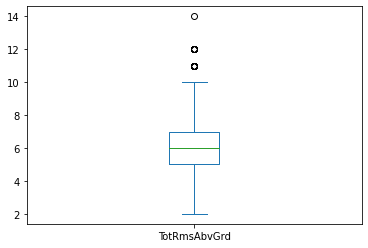

In [486]:
data1['TotRmsAbvGrd'].plot(kind='box')

In [487]:
data1["TotRmsAbvGrd"].value_counts()

6     401
7     329
5     274
8     185
4      97
9      75
10     46
11     18
3      17
12      9
2       1
14      1
Name: TotRmsAbvGrd, dtype: int64

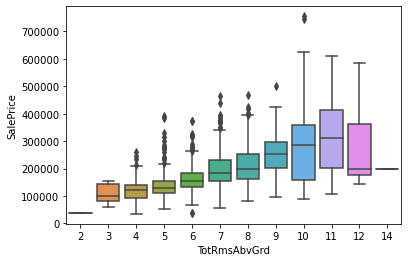

In [488]:
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = data)
plt.show()

In [489]:
# to in my view it would wrong to get rid of outliers we think based on the number of rooms. 
#I would just keep it as it is . 
# mostly i would get rid of outliers for Sale price later on 

In [490]:
data1["KitchenQual"].value_counts()

TA    734
Gd    582
Ex     98
Fa     39
Name: KitchenQual, dtype: int64

In [491]:
data1["KitchenAbvGr"].value_counts()

1    1385
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

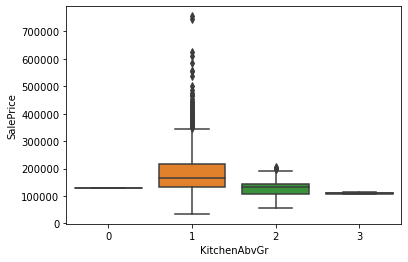

In [492]:
sns.boxplot(x = 'KitchenAbvGr', y = 'SalePrice', data = data)
plt.show()

In [493]:
# based on above visual inspection , let me the keep the kitchen variable as it is 

In [494]:
data1["BedroomAbvGr"].value_counts()

3    801
2    358
4    210
1     50
5     20
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

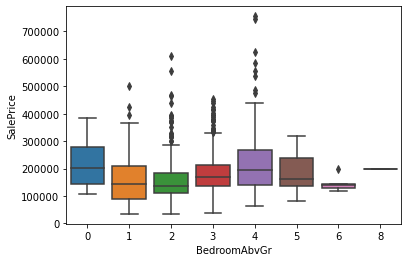

In [495]:
sns.boxplot(x = 'BedroomAbvGr', y = 'SalePrice', data = data)
plt.show()

In [496]:
# looking at all non null numerical variables - let me keep them as itis 
# 1stFlrSF	2ndFlrSF	LowQualFinSF	GrLivArea	BsmtFullBath	BsmtHalfBath	FullBath	HalfBath	BedroomAbvGr

In [497]:
data1["Electrical"].value_counts()

SBrkr    1327
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [498]:
data1["Electrical"].isnull().value_counts()

False    1452
True        1
Name: Electrical, dtype: int64

In [499]:
# let me get rid of the row where electrical system is unknow 

In [500]:
data2 = data1[~data1.Electrical.isnull()]

In [501]:
data2["CentralAir"].value_counts()

Y    1357
N      95
Name: CentralAir, dtype: int64

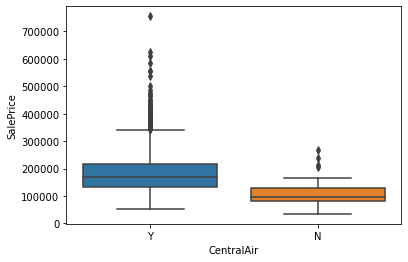

In [502]:
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = data2)
plt.show()

In [503]:
data2["HeatingQC"].value_counts()

Ex    739
TA    425
Gd    239
Fa     48
Po      1
Name: HeatingQC, dtype: int64

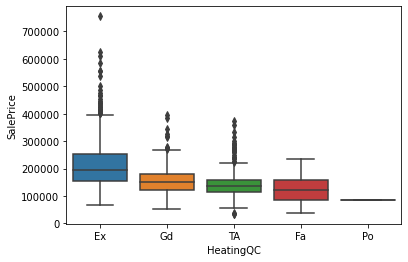

In [504]:
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = data2)
plt.show()

In [505]:
data2["Heating"].value_counts()

GasA     1420
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

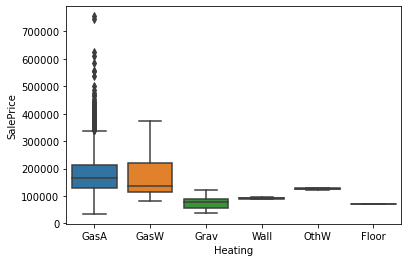

In [506]:
sns.boxplot(x = 'Heating', y = 'SalePrice', data = data)
plt.show()

In [507]:
# i would think of dropping some of the cateogires later 

In [508]:
data2["BsmtQual"].value_counts()

TA    646
Gd    615
Ex    119
Fa     35
Name: BsmtQual, dtype: int64

In [509]:
data2["BsmtQual"].isnull().value_counts()

False    1415
True       37
Name: BsmtQual, dtype: int64

In [510]:
# there are 37 houses without basement . 
# Given there are several variables involving this basement,
# i think of building the model for houses with basement rather than without it . 

In [511]:
# looking dataset info, following variables are straight forward 
# MasVnrArea	ExterQual	ExterCond	Foundation

In [512]:
data2["MasVnrType"].value_counts()

None       859
BrkFace    443
Stone      127
BrkCmn      15
Name: MasVnrType, dtype: int64

In [513]:
data2["MasVnrType"].isnull().value_counts()

False    1444
True        8
Name: MasVnrType, dtype: int64

In [514]:
# let me get rid of rows where data is unknown 

In [515]:
data3 = data2[~data2.MasVnrType.isnull()]

In [516]:
#data3.info()

In [517]:
data3["Exterior1st"].value_counts()

VinylSd    509
HdBoard    221
MetalSd    220
Wd Sdng    204
Plywood    105
CemntBd     59
BrkFace     50
WdShing     26
Stucco      23
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

In [518]:
data3["Exterior2nd"].value_counts()

VinylSd    498
MetalSd    214
HdBoard    206
Wd Sdng    197
Plywood    139
CmentBd     58
Wd Shng     38
BrkFace     25
Stucco      24
AsbShng     20
ImStucc      9
Brk Cmn      7
Stone        4
AsphShn      3
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

In [519]:
data3[data3.Exterior1st != data3.Exterior2nd]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,272,0,0,NaN,0,2,2006,WD,Abnorml,140000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,205,0,0,NaN,0,4,2008,WD,Abnorml,129900
11,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,7,2006,New,Partial,345000
12,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,0,176,NaN,0,9,2008,WD,Normal,144000
19,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,5,2009,COD,Abnorml,139000
23,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,6,2007,WD,Normal,129900
39,90,RL,65.0,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,6,2008,WD,AdjLand,82000
44,20,RL,70.0,7945,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,5,2006,WD,Normal,141000
53,20,RL,68.0,50271,Pave,NaN,IR1,Low,AllPub,Inside,...,0,0,0,NaN,0,11,2006,WD,Normal,385000
55,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,407,0,NaN,0,7,2008,WD,Normal,180500


In [520]:
# where there many rows where exterior covering the house are more than one material ..so let me keep it as it is.

In [521]:
data3.iloc[:,0:20].head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000


In [522]:
data3.iloc[:,0:20][data3.YearBuilt != data3.YearRemodAdd]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950
11,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2005,2006
13,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2006,2007
15,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001
19,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965


In [523]:
# looking at above data it seems houses are remodelled even a year later . So let me keep the data as it is. 

In [524]:
data3.iloc[:,10:25][data3.Condition1 != data3.Condition2]

,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType
1,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None
7,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone
8,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None
18,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,5,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None
29,Gtl,BrkSide,Feedr,RRNn,1Fam,1Story,4,6,1927,1950,Gable,CompShg,MetalSd,MetalSd,None
30,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,None
52,Mod,IDOTRR,RRNn,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,Wd Sdng,Wd Sdng,None
60,Gtl,SawyerW,RRAe,Norm,1Fam,1Story,6,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,None
63,Gtl,OldTown,RRAn,Feedr,1Fam,2Story,7,6,1921,1950,Gable,CompShg,Stucco,Stucco,None
66,Gtl,NAmes,PosA,Norm,1Fam,1Story,7,5,1970,1989,Gable,CompShg,Plywood,Plywood,BrkFace


In [525]:
# looking at above data , there are many houses with multiple proximity conditions ..so let me keep it as it is

In [526]:
data3["Utilities"].value_counts()

AllPub    1443
NoSeWa       1
Name: Utilities, dtype: int64

In [527]:
# let me get rid of the exceptional cases where utilities are not available 

In [528]:
data4 = data3[data3.Utilities != "NoSeWa"]


In [529]:
data4.drop(['Utilities'], axis = 1, inplace = True)
#data4.info()

In [530]:
data4["LandSlope"].value_counts()

Gtl    1365
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [532]:
data4.iloc[:,-5:][data4.LandSlope == "Sev"]

,MoSold,YrSold,SaleType,SaleCondition,SalePrice
120,10,2006,WD,Normal,180000
249,6,2007,WD,Normal,277000
271,4,2008,WD,Normal,241500
313,6,2009,WD,Normal,375000
335,8,2008,WD,Normal,228950
375,3,2009,WD,Normal,61000
588,6,2009,WD,Partial,143000
628,9,2007,WD,Family,135000
693,12,2006,WD,Abnorml,108480
706,6,2007,WD,Normal,302000


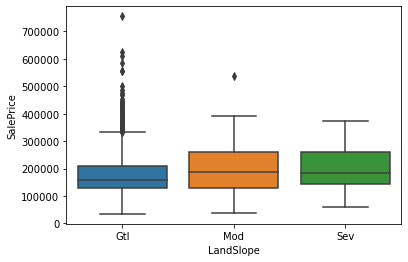

In [533]:
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = data4)
plt.show()

In [534]:
#even though houses with severe slope is quite few but let me keep it for the final mmodel 

In [535]:
data4["Alley"].value_counts()

Grvl    50
Pave    40
Name: Alley, dtype: int64

In [536]:
data4["Alley"].isnull().value_counts()

True     1353
False      90
Name: Alley, dtype: int64

In [537]:
data4.drop(['Alley'], axis = 1, inplace = True)
#data4.info()

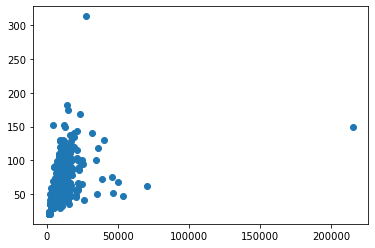

In [538]:
fig = plt.figure()
plt.scatter(data4.LotArea, data4.LotFrontage)

In [539]:
data4.LotFrontage.isnull().value_counts()

False    1188
True      255
Name: LotFrontage, dtype: int64

In [540]:
# LOT frontage on checking on the internet seems to be vital factor. unknown value are too large to drop. 
# so let me update the unknown with mean given LOT area is having all valid data

In [541]:
data4["LotFrontage"]=data4["LotFrontage"].fillna(data4["LotFrontage"].mean())

In [542]:
data4.LotFrontage.isnull().value_counts()

False    1443
Name: LotFrontage, dtype: int64

In [543]:
#data4.info()

In [544]:
# Lets address all null values now 

In [545]:
data4["Fence"]=data4["Fence"].fillna("No Fence")

In [546]:
# typically for sale and resale housing with garage will important factor in developed countries . 
# so i will remove houses for the model where there no gaarage

In [547]:
data4 = data4[~data4.GarageType.isnull()]

In [548]:
data4["FireplaceQu"]=data4["FireplaceQu"].fillna("NoFireplace")
#data4.info()

In [549]:
data4.BsmtQual.isnull().value_counts()

False    1332
True       30
Name: BsmtQual, dtype: int64

In [614]:
data5 = data4[~data4.BsmtQual.isnull()]
#data5.info()

In [615]:
data5 = data5[~data5.BsmtExposure.isnull()]
data5 = data5[~data5.BsmtFinType2.isnull()]
#data5.info()

In [616]:
# looking at the dictionary , the MSGSUBCLASS in my view needs to be treated as categorial variable rather nnumerical

In [617]:
data5.MSSubClass = data5.MSSubClass.astype('str')

In [618]:
#data5.info()

In [619]:
data_numeric = data5.select_dtypes(include=['float64', 'int64'])
data_numeric.head()
data_numeric.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold',
       'YrSold', 'SalePrice'],
      dtype='object')

In [620]:
cor = data_numeric.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SalePrice
LotFrontage,1.000000,0.269769,0.202702,-0.033613,0.102969,0.070970,0.160759,0.126198,0.041592,0.120097,...,0.303870,0.067113,0.122031,-0.012223,0.070460,0.036951,-0.001430,0.036043,0.018876,0.333488
LotArea,0.269769,1.000000,0.078291,0.004715,-0.007745,-0.001825,0.084498,0.176268,0.111383,-0.012050,...,0.150855,0.166237,0.069684,-0.026442,0.020334,0.037307,0.040331,0.009071,-0.009903,0.260003
OverallQual,0.202702,0.078291,1.000000,-0.160110,0.573455,0.550598,0.400978,0.174815,-0.087389,0.298757,...,0.523730,0.220368,0.304052,-0.128891,0.027284,0.045327,-0.031046,0.067925,-0.011310,0.789370
OverallCond,-0.033613,0.004715,-0.160110,1.000000,-0.419920,0.037226,-0.141547,-0.054312,0.036979,-0.163286,...,-0.202428,-0.017782,-0.062243,0.083948,0.023772,0.057200,0.079497,-0.013415,0.055781,-0.108032
YearBuilt,0.102969,-0.007745,0.573455,-0.419920,1.000000,0.618087,0.299414,0.226381,-0.069060,0.147558,...,0.446798,0.212502,0.216003,-0.384925,0.029019,-0.072309,-0.034273,0.003659,-0.009327,0.512562
YearRemodAdd,0.070970,-0.001825,0.550598,0.037226,0.618087,1.000000,0.169108,0.092656,-0.084357,0.173145,...,0.386162,0.203503,0.234268,-0.227123,0.039440,-0.047727,-0.000310,0.015944,0.035270,0.510450
MasVnrArea,0.160759,0.084498,0.400978,-0.141547,0.299414,0.169108,1.000000,0.239720,-0.087529,0.106934,...,0.361144,0.152602,0.119511,-0.111252,0.015698,0.045593,-0.030302,-0.004843,-0.004592,0.484764
BsmtFinSF1,0.126198,0.176268,0.174815,-0.054312,0.226381,0.092656,0.239720,1.000000,-0.067595,-0.580141,...,0.253162,0.193209,0.083127,-0.120080,0.029858,0.058033,0.007170,-0.004475,0.027912,0.370741
BsmtFinSF2,0.041592,0.111383,-0.087389,0.036979,-0.069060,-0.084357,-0.087529,-0.067595,1.000000,-0.230038,...,-0.054774,0.064468,0.003693,0.043194,-0.031116,0.069424,-0.000834,-0.016483,0.036980,-0.031273
BsmtUnfSF,0.120097,-0.012050,0.298757,-0.163286,0.147558,0.173145,0.106934,-0.580141,-0.230038,1.000000,...,0.201285,-0.021376,0.124082,0.002355,0.023337,-0.017119,-0.015953,0.027526,-0.042347,0.199913


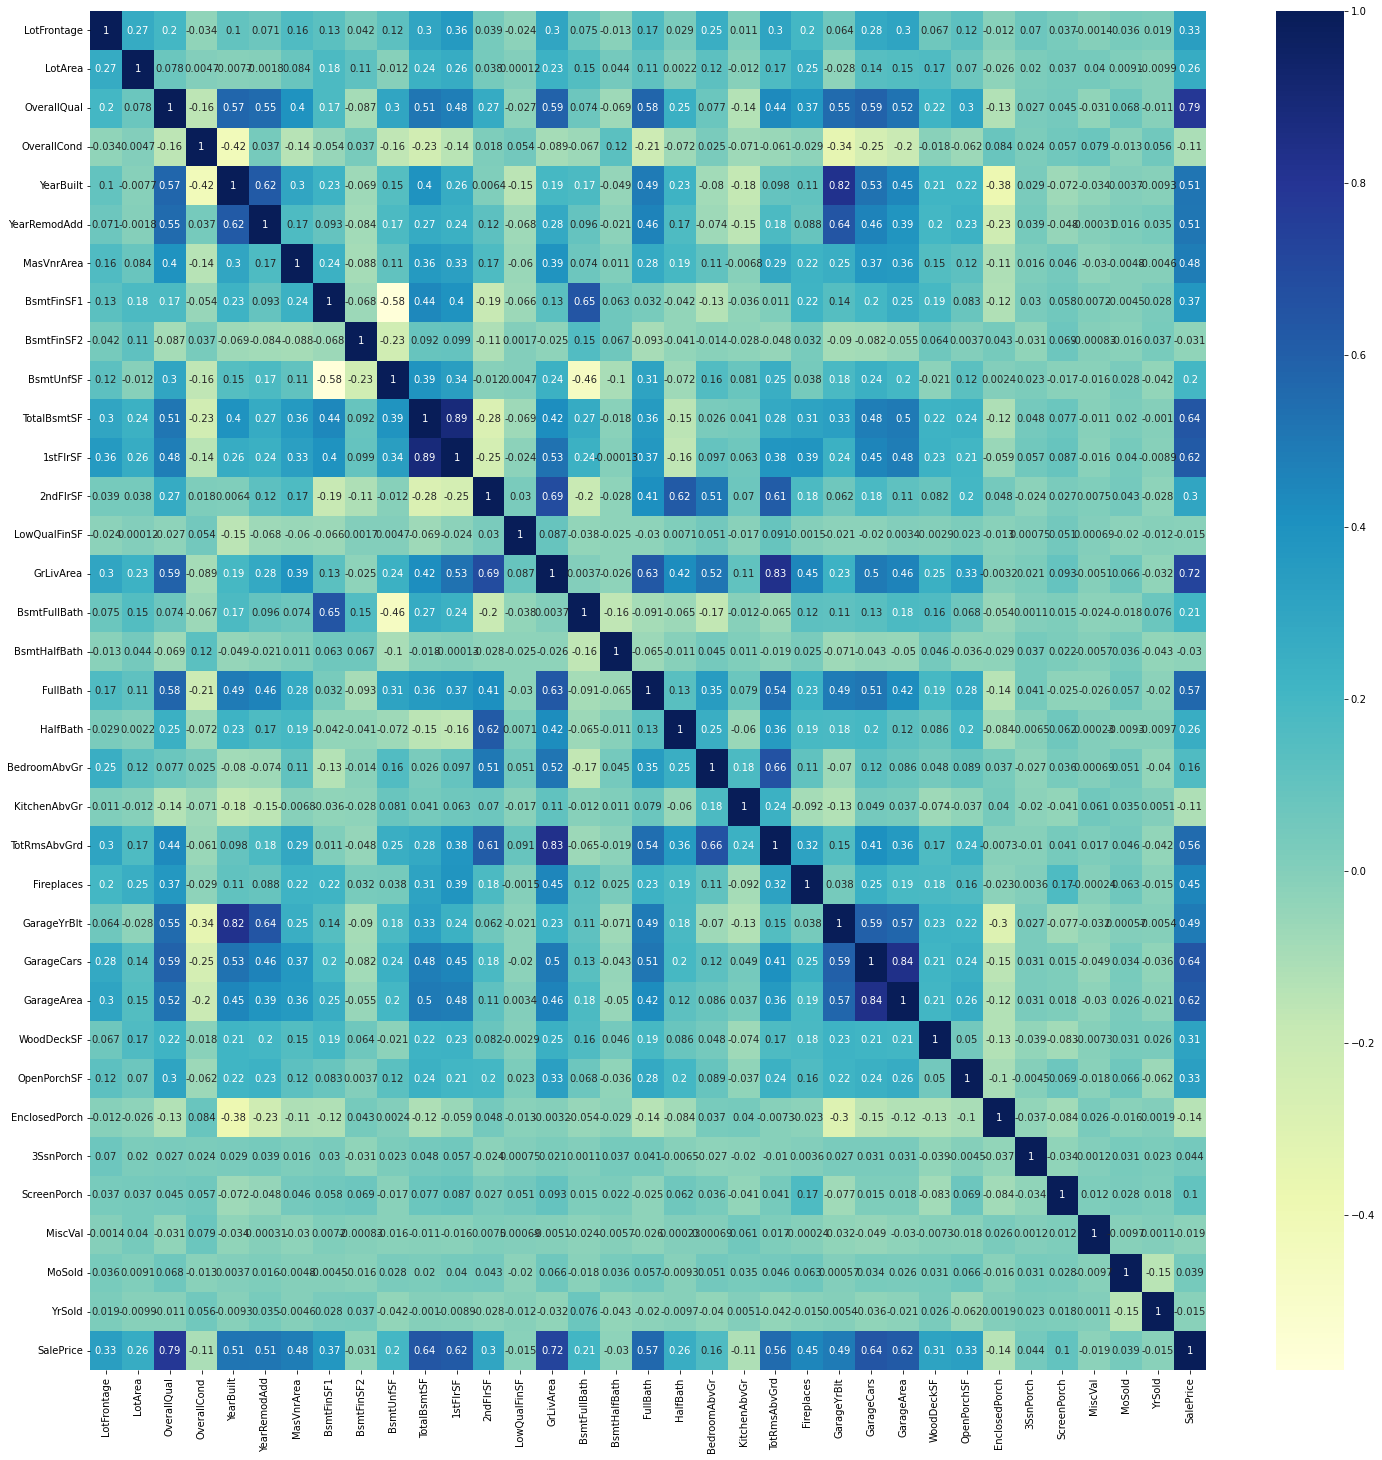

In [621]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(25,25))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [622]:
# from above number of Garrage Cars has high coorelation with Garage Area , Garage year built with Year built ,
# total rooms above ground GrdLive Area 


In [623]:
data5.drop(['GarageCars','GarageYrBlt'], axis = 1, inplace = True)
#data5.info()

<AxesSubplot:>

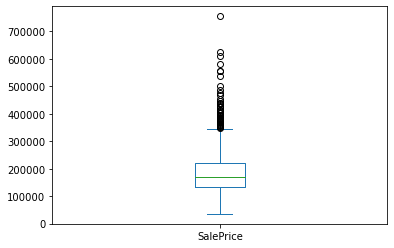

In [624]:
data5['SalePrice'].plot(kind='box')

In [625]:
data5.loc[data5.SalePrice > 400000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
58,60,RL,66.000000,13682,Pave,IR2,HLS,CulDSac,Gtl,StoneBr,...,37,0,0,No Fence,0,10,2006,New,Partial,438780
161,60,RL,110.000000,13688,Pave,IR1,Lvl,Inside,Gtl,NridgHt,...,0,0,0,No Fence,0,3,2008,WD,Normal,412500
178,20,RL,63.000000,17423,Pave,IR1,Lvl,CulDSac,Gtl,StoneBr,...,0,0,0,No Fence,0,7,2009,New,Partial,501837
185,75,RM,90.000000,22950,Pave,IR2,Lvl,Inside,Gtl,OldTown,...,0,0,410,GdPrv,0,6,2006,WD,Normal,475000
231,60,RL,174.000000,15138,Pave,IR1,Lvl,Inside,Gtl,NoRidge,...,202,0,0,No Fence,0,7,2009,WD,Normal,403000
278,20,RL,107.000000,14450,Pave,Reg,Lvl,Inside,Gtl,NridgHt,...,0,0,142,No Fence,0,5,2007,New,Partial,415298
349,60,RL,56.000000,20431,Pave,IR2,Lvl,Inside,Gtl,NridgHt,...,0,0,0,No Fence,0,4,2006,New,Partial,437154
389,60,RL,96.000000,12474,Pave,Reg,Lvl,Inside,Gtl,NridgHt,...,0,0,0,No Fence,0,8,2008,New,Partial,426000
440,20,RL,105.000000,15431,Pave,Reg,Lvl,Inside,Gtl,NridgHt,...,0,0,170,No Fence,0,4,2009,WD,Normal,555000
473,20,RL,110.000000,14977,Pave,IR1,Lvl,Inside,Gtl,NridgHt,...,0,0,0,No Fence,0,7,2007,New,Partial,440000


In [626]:
# Getting rid of outliers in the target variable
data5 = data5.loc[data5.SalePrice <= 400000]
data5.info()
data6 = data5[:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1304 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1304 non-null   object 
 1   MSZoning       1304 non-null   object 
 2   LotFrontage    1304 non-null   float64
 3   LotArea        1304 non-null   int64  
 4   Street         1304 non-null   object 
 5   LotShape       1304 non-null   object 
 6   LandContour    1304 non-null   object 
 7   LotConfig      1304 non-null   object 
 8   LandSlope      1304 non-null   object 
 9   Neighborhood   1304 non-null   object 
 10  Condition1     1304 non-null   object 
 11  Condition2     1304 non-null   object 
 12  BldgType       1304 non-null   object 
 13  HouseStyle     1304 non-null   object 
 14  OverallQual    1304 non-null   int64  
 15  OverallCond    1304 non-null   int64  
 16  YearBuilt      1304 non-null   int64  
 17  YearRemodAdd   1304 non-null   int64  
 18  RoofStyl

### Data Preparation

In [627]:
data6['SalePrice(reduced)'] = data6['SalePrice']/10000

In [628]:
data6.drop(['SalePrice'], axis = 1, inplace = True)
X = data6.iloc[:,:-1]
y = data6["SalePrice(reduced)"]

In [629]:
# creating dummy variables for categorical variables

# subset all categorical variables
data_categorical = X.select_dtypes(include=['object'])
data_categorical.head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,NoFireplace,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
1,20,RL,Pave,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
2,60,RL,Pave,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal
3,70,RL,Pave,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,...,Typ,Gd,Detchd,Unf,TA,TA,Y,No Fence,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,...,Typ,TA,Attchd,RFn,TA,TA,Y,No Fence,WD,Normal


In [630]:
# convert into dummies - one hot encoding
data_dummies = pd.get_dummies(data_categorical, drop_first=True)
data_dummies.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [631]:
X = X.drop(list(data_categorical.columns), axis=1)

In [632]:
X = pd.concat([X, data_dummies], axis=1)

In [633]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [634]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=244)

In [635]:
X.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.236855,-0.199313,0.667262,-0.557899,1.034251,0.870047,0.554141,0.616418,-0.293382,-0.987138,...,-0.04802,-0.05547,-0.291305,-0.027703,0.377964,-0.027703,-0.067989,-0.124805,0.444330,-0.295927
1,0.492787,-0.086345,-0.123747,2.215290,0.118178,-0.458053,-0.597319,1.263066,-0.293382,-0.678510,...,-0.04802,-0.05547,-0.291305,-0.027703,0.377964,-0.027703,-0.067989,-0.124805,0.444330,-0.295927
2,-0.090927,0.075741,0.667262,-0.557899,0.966394,0.820858,0.354398,0.093394,-0.293382,-0.333031,...,-0.04802,-0.05547,-0.291305,-0.027703,0.377964,-0.027703,-0.067989,-0.124805,0.444330,-0.295927
3,-0.480069,-0.091256,0.667262,-0.557899,-1.951469,-0.753186,-0.597319,-0.548499,-0.293382,-0.088892,...,-0.04802,-0.05547,-0.291305,-0.027703,0.377964,-0.027703,-0.067989,-0.124805,-2.250581,-0.295927
4,0.687358,0.371423,1.458270,-0.557899,0.932465,0.722481,1.458859,0.495172,-0.293382,-0.204052,...,-0.04802,-0.05547,-0.291305,-0.027703,0.377964,-0.027703,-0.067989,-0.124805,0.444330,-0.295927


In [636]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Model 1 - using Linear Regression 

In [637]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [638]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

6820147010.340127
[ 9.37406757e-02  5.03663379e-01  9.41967772e-01  5.95150647e-01
  1.06583787e+00  1.54330596e-01  1.83065934e-01  6.74645392e+11
  2.67269751e+11  6.96375901e+11 -5.73938303e+11 -2.52208720e+11
 -3.02554713e+11 -2.59077216e+10  3.30843785e+11  1.40617371e-01
 -2.27609873e-02 -1.22299194e-02 -5.49316406e-03 -1.06475830e-01
 -2.19814301e-01  2.28986740e-01  3.40797424e-01  6.93283081e-01
  3.31672668e-01  6.69860840e-03 -1.70402527e-02  8.29772949e-02
  2.25509644e-01  4.43496704e-02 -1.11007690e-02 -3.28216553e-02
 -9.29412842e-02  6.83593750e-03 -2.45267021e+11  1.20597839e+00
  4.13963318e-01  1.90437317e-01  2.74548768e+11  8.79936218e-01
  7.74055481e-01  6.35740280e-01  4.91634369e-01  2.56710052e-01
  1.95175171e-01  6.13162705e+11  8.53858948e-01  2.16804504e-01
  1.20303726e+00  8.68892670e-01  1.95159912e-01 -6.00280762e-02
  9.43470001e-02  5.63507080e-02  1.64329529e-01 -1.87683105e-03
  1.44409180e-01  2.09777832e-01 -9.29260254e-02 -4.46090698e-02
 -2.901

from sklearn.metrics import r2_score, mean_squared_error

y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

# Model 2 Ridge Regression 

In [693]:
from sklearn.model_selection import GridSearchCV
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)  

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [694]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [695]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.58994271e-01  4.29338294e-01  9.78796849e-01  4.39003082e-01
  4.11245928e-01  2.68792529e-01  2.25183817e-01  4.12774911e-01
  1.14610321e-01 -1.00356684e-01  4.16808890e-01  5.75224974e-01
  4.30015620e-01 -3.65592202e-02  8.28889200e-01  1.39348069e-01
 -4.66190149e-02  1.35819006e-01  1.27493079e-01 -2.39454374e-02
 -2.67680013e-01  3.76389473e-01  2.59675298e-01  6.55927290e-01
  3.64574873e-01  4.86834624e-02 -3.15514710e-02  9.17879744e-02
  1.77906001e-01  4.65576635e-02 -1.87740483e-03 -8.16669159e-03
 -1.14311685e-01  1.26389743e-02 -4.15819176e-02  2.27094515e-01
 -6.41196262e-02  8.69002071e-02 -2.27050767e-02  1.50541315e-01
  8.10071420e-02  1.06757307e-01  1.23638547e-01 -6.86257427e-02
 -6.07811590e-02 -7.10510915e-02  2.18784484e-01 -2.98251381e-02
  1.50480424e-01 -5.66062934e-02  2.03446746e-01 -1.80460124e-02
  8.83998848e-02 -1.40153816e-02  1.72505565e-01 -2.35552132e-02
  4.91145781e-02  1.92432128e-01 -1.06928828e-01 -6.08352146e-02
 -4.27559637e-02  1.02722

In [696]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9188100127414763
0.9063849286972032
3050.7355792468597
1622.0571446262709
3.345104801805767
4.13790087914865


In [697]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


### Model3 - Lasso 

In [698]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [699]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.05}


In [700]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.05

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.05)

In [701]:
lasso.coef_

array([ 1.06973484e-01,  4.32039303e-01,  1.44180687e+00,  4.41936741e-01,
        6.96346931e-01,  2.67192273e-01,  1.49282458e-01,  5.64885920e-01,
        6.56396927e-02, -0.00000000e+00,  3.73868567e-01,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  2.06330348e+00,  1.26327633e-01,
       -1.94941349e-02, -0.00000000e+00,  1.62265453e-02, -1.32461817e-02,
       -3.61998197e-01,  1.76433407e-01,  1.89722289e-01,  6.31496767e-01,
        2.90036367e-01,  0.00000000e+00, -0.00000000e+00,  3.30714408e-02,
        1.22321272e-01,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -4.43054402e-02,  0.00000000e+00, -0.00000000e+00,  2.38249538e-01,
       -0.00000000e+00,  2.49578650e-02,  0.00000000e+00,  1.06664776e-02,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.59750321e-02,
       -0.00000000e+00, -6.50135190e-02,  5.96781557e-02, -2.18356771e-02,
        4.26540440e-02, -1.48780499e-02,  4.71165561e-02,  0.00000000e+00,
        0.00000000e+00, -

In [702]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9106378845664461
0.9069058062891212
3357.8054904952182
1613.0319608851444
3.6818042658938794
4.114877451237613


In [703]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([ lr_metric,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.362302e-01,0.918810,0.910638
1,R2 Score (Test),-1.270006e+22,0.906385,0.906906
2,RSS (Train),6.869094e+00,3050.735579,3357.805490
3,RSS (Test),6.570821e+23,1622.057145,1613.031961
4,MSE (Train),8.678653e-02,1.828963,1.918803
5,MSE (Test),4.094179e+10,2.034183,2.028516


### Checking Coefficients 

In [704]:
betas = pd.DataFrame(index=X.columns)
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [705]:
pd.set_option('display.max_rows', None)
betas.head(250)

,Linear,Ridge,Lasso
LotFrontage,9.374068e-02,1.589943e-01,0.106973
LotArea,5.036634e-01,4.293383e-01,0.432039
OverallQual,9.419678e-01,9.787968e-01,1.441807
OverallCond,5.951506e-01,4.390031e-01,0.441937
YearBuilt,1.065838e+00,4.112459e-01,0.696347
YearRemodAdd,1.543306e-01,2.687925e-01,0.267192
MasVnrArea,1.830659e-01,2.251838e-01,0.149282
BsmtFinSF1,6.746454e+11,4.127749e-01,0.564886
BsmtFinSF2,2.672698e+11,1.146103e-01,0.065640
BsmtUnfSF,6.963759e+11,-1.003567e-01,-0.000000


In [708]:
betas.Ridge.nlargest(n=10)

OverallQual             0.978797
GrLivArea               0.828889
GarageArea              0.655927
1stFlrSF                0.575225
Neighborhood_NridgHt    0.573199
Neighborhood_StoneBr    0.481504
OverallCond             0.439003
2ndFlrSF                0.430016
LotArea                 0.429338
Neighborhood_NoRidge    0.426867
Name: Ridge, dtype: float64

In [709]:
betas.Lasso.nlargest(n=10)

GrLivArea               2.063303
OverallQual             1.441807
YearBuilt               0.696347
GarageArea              0.631497
Neighborhood_NridgHt    0.630043
BsmtFinSF1              0.564886
Neighborhood_StoneBr    0.459651
OverallCond             0.441937
LotArea                 0.432039
TotalBsmtSF             0.373869
Name: Lasso, dtype: float64

In [ ]:
# Assignment question - TAKING OUT TOP 5 IN LASSO 

In [672]:
X1 = X[:]
X1.drop(['GrLivArea','OverallQual','GarageArea','BsmtFinSF1','Neighborhood_NridgHt'], axis = 1, inplace = True)

In [673]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [674]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train1, y_train1) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [675]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.05}


In [681]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =0.05

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train1, y_train1)

Lasso(alpha=0.05)

In [689]:
betas1 = pd.DataFrame(index=X1.columns)

In [690]:
betas1['Lasso'] = lasso.coef_

In [692]:
betas1.Lasso.nlargest(n=5)

2ndFlrSF       1.883267
1stFlrSF       1.782655
YearBuilt      1.195983
TotalBsmtSF    0.932699
OverallCond    0.560943
Name: Lasso, dtype: float64